# Лабораторная работа № 2
### Выполнил: Кузнецов С.И.

In [1]:
import pandas as pd
from scipy import stats
import numpy as np

import seaborn as sns
from sklearn import datasets
from matplotlib import pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

### 1. Загрузить файл auto.csv

In [2]:
auto = pd.read_csv('auto.csv')
auto.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,164,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### 2. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)

In [3]:
auto.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,126.365854,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.324878,3.253366,10.142537,106.048780,5131.463415,25.219512,30.751220,13312.712195
std,1.245307,35.438400,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273049,0.313937,3.972040,43.468803,480.933330,6.542142,6.886443,8102.472461
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.130000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,120.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [4]:
# Среднее
auto.describe().loc['mean']

symboling                0.834146
normalized-losses      126.365854
wheel-base              98.756585
length                 174.049268
width                   65.907805
height                  53.724878
curb-weight           2555.565854
engine-size            126.907317
bore                     3.324878
stroke                   3.253366
compression-ratio       10.142537
horsepower             106.048780
peak-rpm              5131.463415
city-mpg                25.219512
highway-mpg             30.751220
price                13312.712195
Name: mean, dtype: float64

In [5]:
# Медиана
auto.describe().loc['50%']

symboling                1.00
normalized-losses      122.00
wheel-base              97.00
length                 173.20
width                   65.50
height                  54.10
curb-weight           2414.00
engine-size            120.00
bore                     3.31
stroke                   3.29
compression-ratio        9.00
horsepower              95.00
peak-rpm              5200.00
city-mpg                24.00
highway-mpg             30.00
price                10295.00
Name: 50%, dtype: float64

In [6]:
# Минимум
auto.describe().loc['min']

symboling              -2.00
normalized-losses      65.00
wheel-base             86.60
length                141.10
width                  60.30
height                 47.80
curb-weight          1488.00
engine-size            61.00
bore                    2.54
stroke                  2.07
compression-ratio       7.00
horsepower             48.00
peak-rpm             4150.00
city-mpg               13.00
highway-mpg            16.00
price                5118.00
Name: min, dtype: float64

In [7]:
# Максимум
auto.describe().loc['max']

symboling                3.00
normalized-losses      256.00
wheel-base             120.90
length                 208.10
width                   72.30
height                  59.80
curb-weight           4066.00
engine-size            326.00
bore                     3.94
stroke                   4.17
compression-ratio       23.00
horsepower             288.00
peak-rpm              6600.00
city-mpg                49.00
highway-mpg             54.00
price                45400.00
Name: max, dtype: float64

In [8]:
# сред. отклонение
auto.describe().loc['std']

symboling               1.245307
normalized-losses      35.438400
wheel-base              6.021776
length                 12.337289
width                   2.145204
height                  2.443522
curb-weight           520.680204
engine-size            41.642693
bore                    0.273049
stroke                  0.313937
compression-ratio       3.972040
horsepower             43.468803
peak-rpm              480.933330
city-mpg                6.542142
highway-mpg             6.886443
price                8102.472461
Name: std, dtype: float64

### 3. Рассчитать и визуализировать корреляционную матрицу для переменных

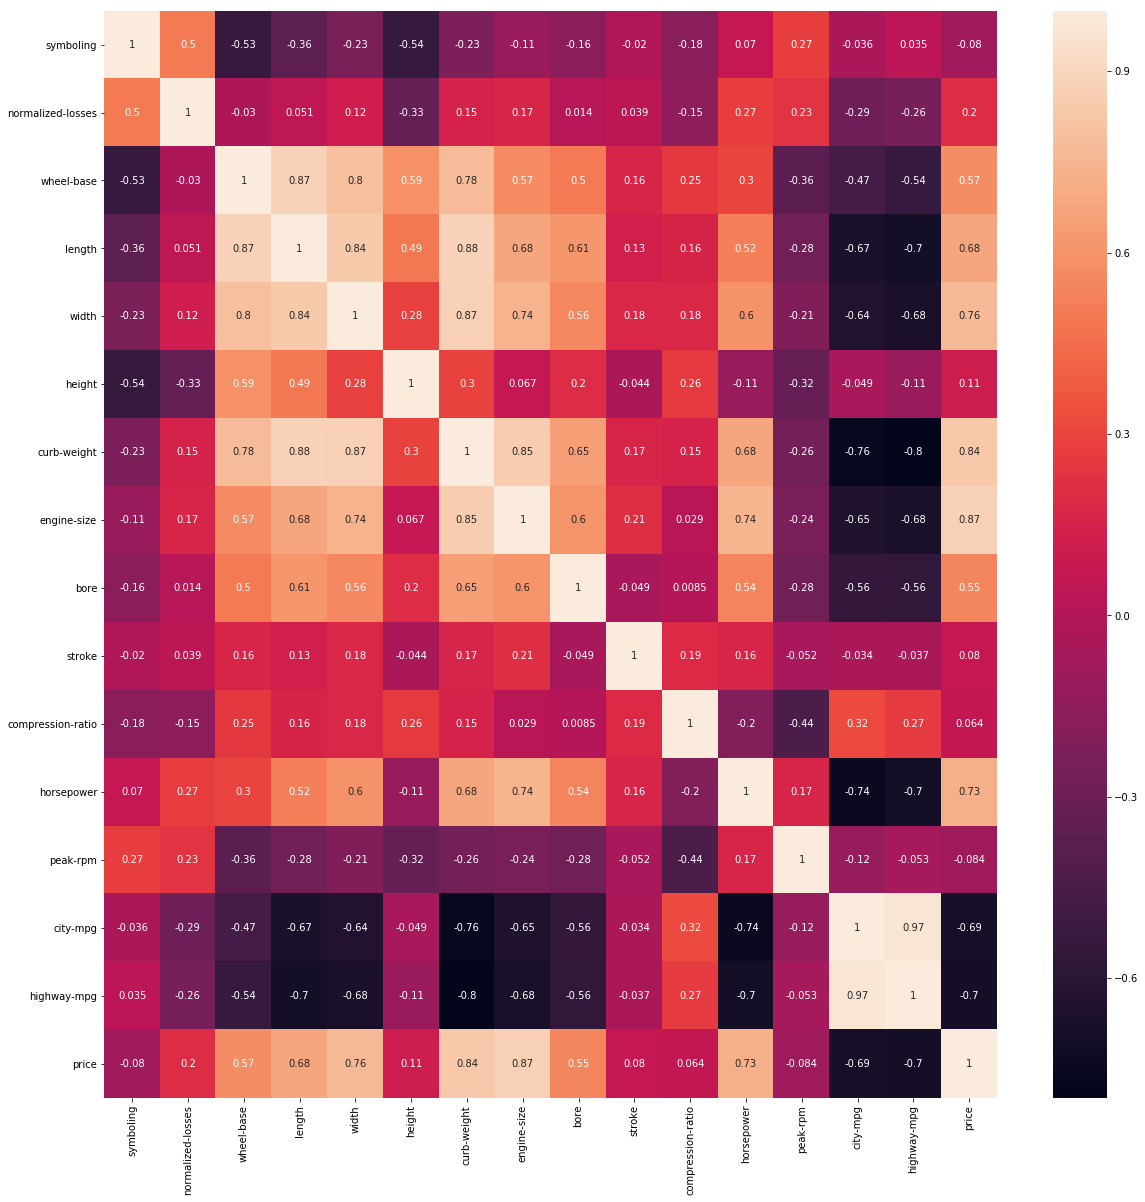

In [9]:
corr = auto.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

### 4. Визуализировать распределение переменной ‘Price’, рассчитать показатели skewness и kurtosis

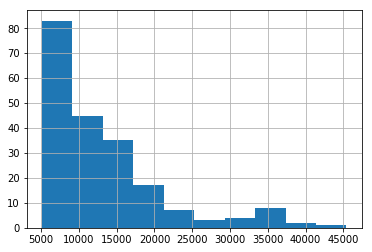

In [10]:
auto.price.hist(bins = 10)


In [11]:
auto_skewness = stats.skew(auto.price)
auto_kurtosis = stats.kurtosis(auto.price)

print('skewness: {:4f}\t kurtosis: {:4f}'.format(auto_skewness, auto_kurtosis))

skewness: 1.753449	 kurtosis: 2.848083


### 5. Визуализировать несколько взаимосвязей между переменными

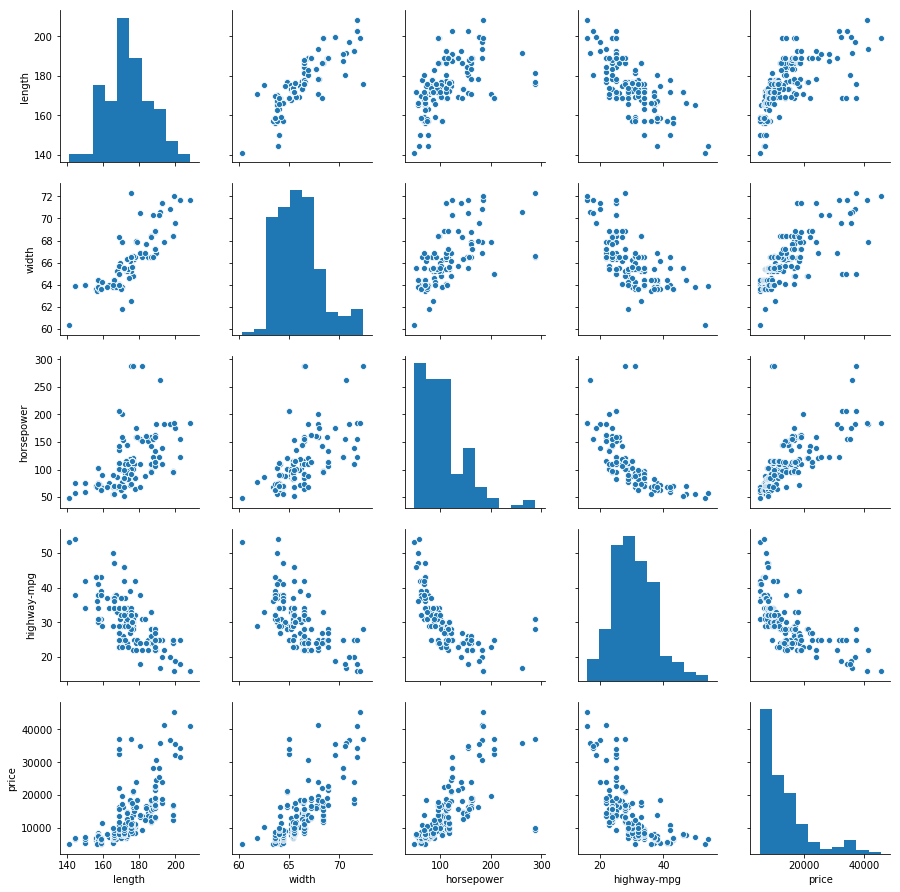

In [12]:
sns.pairplot(data = auto, vars = ['length', 'width', 'horsepower', 'highway-mpg', 'price'])

### 6. С использованием t-test статистики проверить взаимосвязи между несколькими переменными

Проверим гипотезу, что мощность двигателя не зависит от типа топлива (газ или дизель)

In [13]:
auto_gas_horsepower = auto[auto['fuel-type'] == 'gas'].horsepower  # Мощность авто на газу
auto_diesel_horsepower = auto[auto['fuel-type'] == 'diesel'].horsepower  # Мощность авто на дизеле

stats.ttest_ind(auto_gas_horsepower, auto_diesel_horsepower)

Ttest_indResult(statistic=2.365344076957992, pvalue=0.01895573258080751)

**Вывод:** Мощность двигателя зависит от типа топлива

Проверим гипотезу, что автомобили Audi и BMW находятся в одной ценовой категории.

In [14]:
auto_audi_price = auto[auto['make'] == 'audi'].price  # Цены на Audi
auto_bmw_price = auto[auto['make'] == 'bmw'].price  # Цены на BMW

stats.ttest_ind(auto_audi_price, auto_bmw_price)

Ttest_indResult(statistic=-1.960716803553029, pvalue=0.07169704201810101)

**Вывод:** Нет оснований отвергать гипотезу, что автомобили Audi и BMW находятся в одной ценовой категории.

Проверим гипотезу, что цена автомобиля не зависит от типа топлива (газ или дизель)

In [15]:
auto_gas_price = auto[auto['fuel-type'] == 'gas'].price  # Мощность авто на газу
auto_diesel_price = auto[auto['fuel-type'] == 'diesel'].price  # Мощность авто на дизеле

stats.ttest_ind(auto_gas_price, auto_diesel_price)

Ttest_indResult(statistic=-1.4715061487687495, pvalue=0.1427027883743746)

**Вывод:** Нет оснований отвергать гипотезу, что что цена автомобиля не зависит от типа топлива (газ или дизель).